In [1]:
# Global Terrorism Database EDA
# https://www.kaggle.com/code/amalab182/global-terrorism-analysis/notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# to import dataset
# error msg with 'latin-1' : UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position invalid continuation byte
    df = pd.read_csv('C:/Users/miche/Desktop/machine_learning/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1', low_memory=False)

In [5]:
# to display variables in the dataset
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
# to check if variables are in their correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
# to display columns in dataset
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
# to check for missing values in dataset
df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [9]:
# to see the correlation of all numeric values in dataset
df.select_dtypes(['float','int']).corr()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
eventid,1.000000,0.999996,0.002706,0.018336,0.091761,-0.135039,0.401371,0.166886,0.003907,0.030641,...,-0.009990,-0.018001,-0.014094,-0.165422,0.256113,-0.181612,-0.143600,-0.133252,-0.077852,-0.175605
iyear,0.999996,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.166933,0.003917,0.030626,...,-0.009984,-0.018216,-0.014238,-0.165375,0.256092,-0.181556,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.002706,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.015978,-0.003880,0.003621,...,-0.000710,0.046989,0.058878,-0.016597,0.011295,-0.011535,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018336,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,0.003423,-0.002285,-0.006991,...,0.012755,-0.010502,0.003148,-0.006581,-0.006706,0.001765,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091761,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,-0.024749,0.000523,0.057897,...,-0.008114,0.028177,0.001966,0.009367,0.233293,-0.192155,0.071768,0.075147,0.027335,0.080767
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nreleased,-0.181612,-0.181556,-0.011535,0.001765,-0.192155,-0.044331,-0.149511,0.002790,-0.017745,-0.030631,...,0.054571,0.034843,0.049322,0.016832,-0.555478,1.000000,0.039388,0.040947,0.085055,0.064759
INT_LOG,-0.143600,-0.143601,-0.002302,-0.001540,0.071768,0.069904,-0.082584,-0.099827,0.002272,0.073022,...,0.035821,0.031079,0.007029,-0.045504,-0.015442,0.039388,1.000000,0.996211,0.052537,0.891051
INT_IDEO,-0.133252,-0.133253,-0.002034,-0.001621,0.075147,0.067564,-0.071917,-0.094470,0.002268,0.071333,...,0.039053,0.041983,0.013162,-0.039844,-0.016234,0.040947,0.996211,1.000000,0.082014,0.893811
INT_MISC,-0.077852,-0.077847,-0.002554,-0.002027,0.027335,0.207281,0.043139,0.097652,0.000371,-0.019197,...,0.023815,0.125162,0.037227,0.129274,-0.119776,0.085055,0.052537,0.082014,1.000000,0.252193


In [10]:
# to rename multiple columns in the dataset by creating a dictionary, key value pairs
# key = old name
# value = new name
dict = {'iyear': 'year',
        'imonth': 'month',
        'iday': 'day',
        'country_txt': 'Country',
        'provstate': 'state',
        'region_txt': 'Region',
        'attacktype1_txt': 'AttackType',
        'target1': 'Target',
        'nkill':'Killed',
        'nwound': 'Wounded',
        'gname': 'Group',
        'targtype1_txt': 'Target_type',
        'weaptype1_txt': 'Weapon_type'}

In [11]:
# using rename() method on the dictionary key value pair
df.rename(columns=dict,
         inplace=True)

In [12]:
# to check is columns have been renamed
df.head()

,eventid,year,month,day,approxdate,extended,resolution,country,Country,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [13]:
# to filter out columns from the dataset that are important for further analysis
df = df[['eventid','year','month','day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded',
        'Target','summary','Group','Target_type','Weapon_type','motive','success']]

In [14]:
# to display variables in selected columns
df.head()

,eventid,year,month,day,Country,Region,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,summary,Group,Target_type,Weapon_type,motive,success
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1


In [15]:
# to check for missing values
df.isnull().sum()

eventid             0
year                0
month               0
day                 0
Country             0
Region              0
state             421
city              435
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            638
summary         66129
Group               0
Target_type         0
Weapon_type         0
motive         131130
success             0
dtype: int64

In [16]:
# to check % missing values in each column
100*df.isnull().sum()/len(df)

eventid         0.000000
year            0.000000
month           0.000000
day             0.000000
Country         0.000000
Region          0.000000
state           0.231712
city            0.239417
latitude        2.507554
longitude       2.508104
AttackType      0.000000
Killed          5.676120
Wounded         8.977330
Target          0.351146
summary        36.396409
Group           0.000000
Target_type     0.000000
Weapon_type     0.000000
motive         72.171984
success         0.000000
dtype: float64

In [17]:
# to check for duplicates in dataset
duplicates = df[df.duplicated()]

In [18]:
# there are no duplicated rows or columns in dataset
duplicates

,eventid,year,month,day,Country,Region,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,summary,Group,Target_type,Weapon_type,motive,success


In [19]:
# to check if variables are in their correct data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   eventid      181691 non-null  int64  
 1   year         181691 non-null  int64  
 2   month        181691 non-null  int64  
 3   day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   Region       181691 non-null  object 
 6   state        181270 non-null  object 
 7   city         181256 non-null  object 
 8   latitude     177135 non-null  float64
 9   longitude    177134 non-null  float64
 10  AttackType   181691 non-null  object 
 11  Killed       171378 non-null  float64
 12  Wounded      165380 non-null  float64
 13  Target       181053 non-null  object 
 14  summary      115562 non-null  object 
 15  Group        181691 non-null  object 
 16  Target_type  181691 non-null  object 
 17  Weapon_type  181691 non-null  object 
 18  motive       50561 non-n

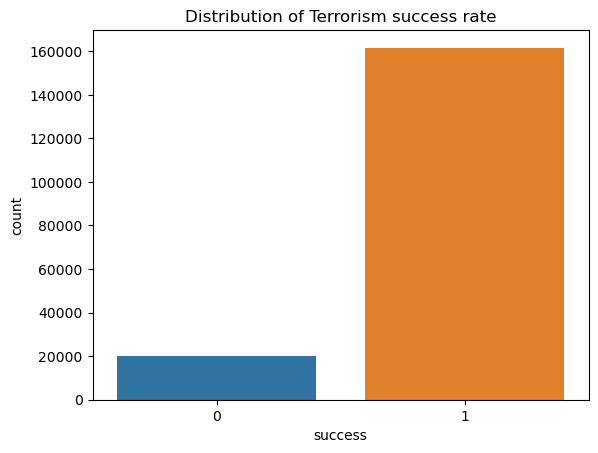

In [20]:
# to plot a countplot of terrorism success rate from dataset
sns.countplot(data=df, x='success')
plt.title('Distribution of Terrorism success rate');

In [21]:
df['success'].value_counts()

success
1    161632
0     20059
Name: count, dtype: int64

In [22]:
# 90% of the Global Terrorism attacks are successful
pd.DataFrame(100*df['success'].value_counts()/len(df))

,count
success,
1,88.959827
0,11.040173


In [23]:
# to see the total number of Terrorism attacks by year
# it is observed that year 2014 has the most global terrorism attack, followed by 2014, then 2015
pd.DataFrame(df['year'].value_counts()).sort_values('count',ascending=False)

,count
year,
2014,16903
2015,14965
2016,13587
2013,12036
2017,10900
2012,8522
2011,5076
1992,5071
2010,4826


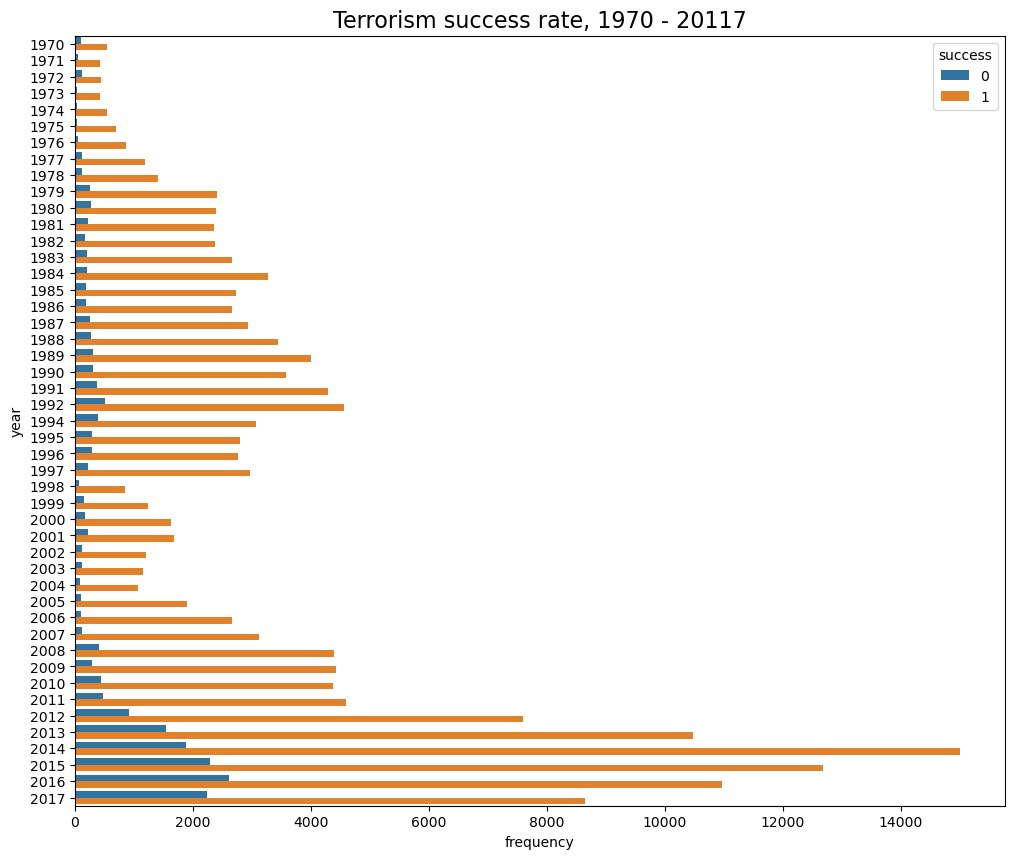

In [25]:
# to plot a countplot of terrorism by year, hue by success rate
# it is observed that the success rate of terrorism attack for 2014 & 2015 is the highest
plt.figure(figsize=(12,10), dpi=100)
sns.countplot(data=df, y='year',hue='success')
plt.title('Terrorism success rate, 1970 - 20117', fontsize=16)
plt.xlabel('frequency');

In [27]:
# to set 'count' as an index count
region_year_attack = df.groupby(['year','Region']).size().reset_index(name='count')

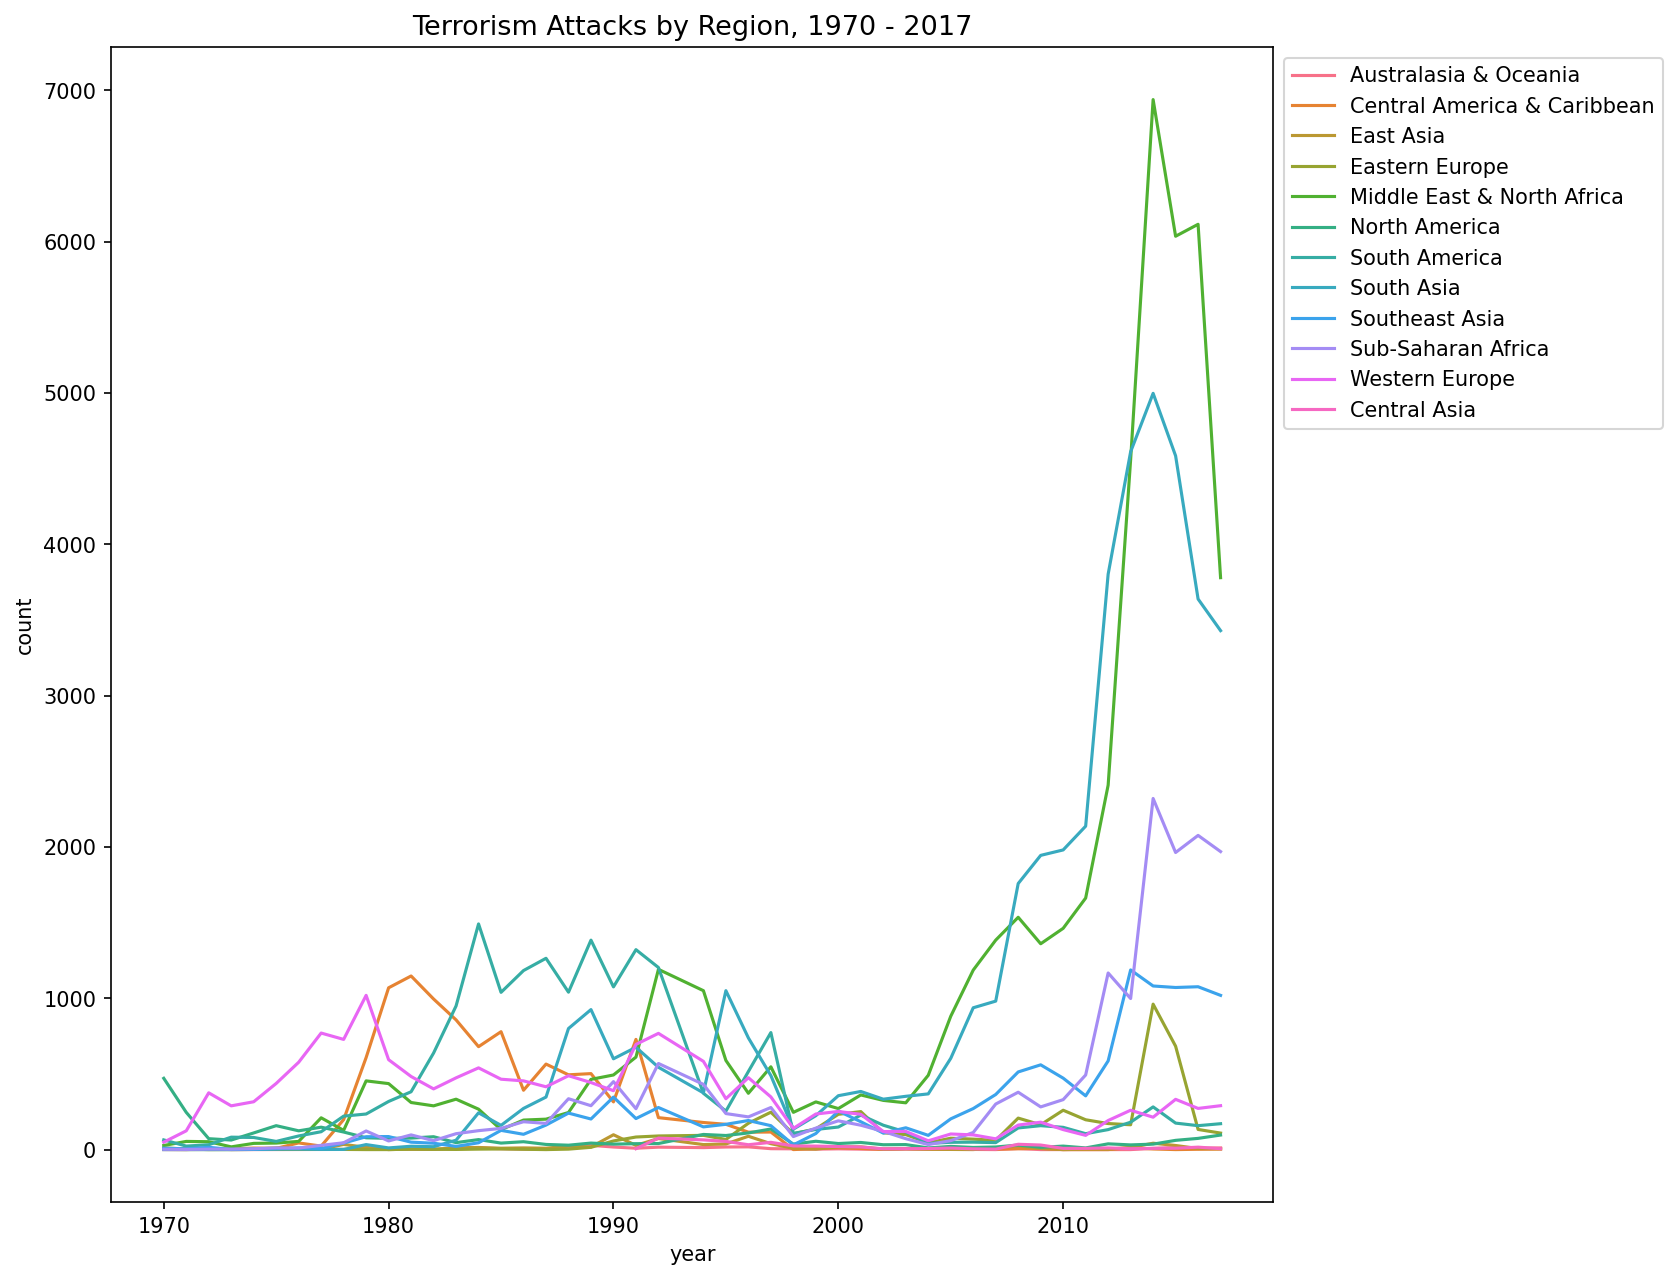

In [28]:
# to visualise terrorism attacks in a lineplot hue by region
# it is observed that 'Middle East & North Africa' has the highest rate of terrorism attack, then Southeast Asia,Sub-Saharan Africa
plt.figure(figsize=(10,10), dpi=150)
sns.lineplot(data=region_year_attack, x='year', y='count', hue='Region')
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Terrorism Attacks by Region, 1970 - 2017', fontsize=13);

In [29]:
# to see top 15 Countries most affected by terrorism attacks
df['Country'].value_counts().head(15)

Country
Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: count, dtype: int64

In [67]:
# to read into a new dataframe
country_attack = df['Country'].value_counts().head(20)

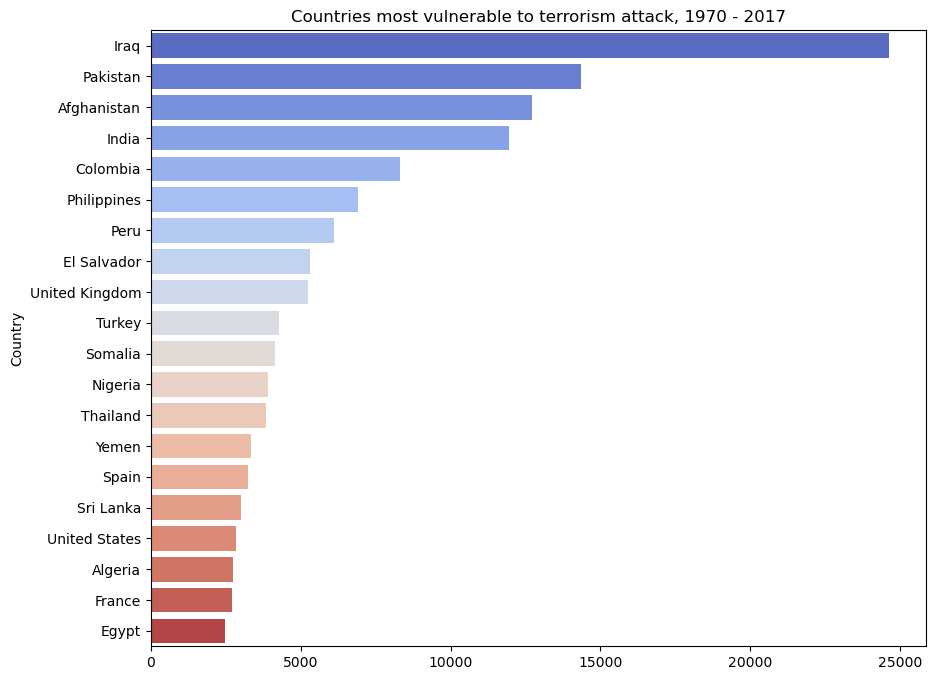

In [99]:
# to visualised Countries attacked in a barplot
plt.figure(figsize=(10,8), dpi=100)
sns.barplot(x=country_attack.values, y=country_attack.index, palette='coolwarm')
plt.title('Countries most vulnerable to terrorism attack, 1970 - 2017',fontsize=12);

In [103]:
# to see Terrorism attacks in Iraq
Iraq = df[df['Country']== 'Iraq']
Iraq.head(10)

,eventid,year,month,day,Country,Region,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,summary,Group,Target_type,Weapon_type,motive,success
4393,197612180001,1976,12,18,Iraq,Middle East & North Africa,Unknown,Penjwon,NaN,NaN,Hostage Taking (Kidnapping),0.0,0.0,agricultural experts in NE Iraq,NaN,Kurdish Democratic Party-Iraq (KDP),Government (General),Unknown,NaN,1
9688,197911210002,1979,11,21,Iraq,Middle East & North Africa,Unknown,Mirbusur,NaN,NaN,Armed Assault,NaN,NaN,Offices,NaN,Barzani Guerrillas,Government (General),Firearms,NaN,1
10109,198001280004,1980,1,28,Iraq,Middle East & North Africa,Baghdad,Baghdad,33.303566,44.371773,Hijacking,0.0,0.0,Middle east,NaN,Shia Muslim extremists,Airports & Aircraft,Melee,NaN,1
10588,198004010019,1980,4,1,Iraq,Middle East & North Africa,Baghdad,Baghdad,33.303566,44.371773,Bombing/Explosion,3.0,7.0,Student Meeting,NaN,Iraqi Mujahideen,Private Citizens & Property,Explosives,NaN,1
11341,198007000004,1980,7,0,Iraq,Middle East & North Africa,Baghdad,Baghdad,33.303566,44.371773,Assassination,2.0,1.0,"Barzan at-Tikriti, brother of Saddam Hussein w...",NaN,Al-Da'wah Party,Government (General),Explosives,NaN,0
12578,198101000003,1981,1,0,Iraq,Middle East & North Africa,Sulaymaniyah,Unknown,35.500143,45.305730,Hostage Taking (Kidnapping),NaN,NaN,"Michael Powell, 28, British water engineer",NaN,Unified Kurdish Socialist Party,Private Citizens & Property,Unknown,NaN,1
13522,198105130004,1981,5,13,Iraq,Middle East & North Africa,At Tamim,Kirkuk,35.452110,44.375465,Hostage Taking (Kidnapping),NaN,NaN,"Karl Ebert, 34, engineer",NaN,Patriotic Union of Kurdistan (PUK),Business,Unknown,NaN,1
13680,198106060002,1981,6,6,Iraq,Middle East & North Africa,Kirkuk,Kirkuk,35.452110,44.375465,Hostage Taking (Kidnapping),NaN,NaN,workers,NaN,Kurds,Business,Unknown,NaN,1
15236,198201090001,1982,1,9,Iraq,Middle East & North Africa,Baghdad,Baghdad,33.303566,44.371773,Bombing/Explosion,NaN,NaN,Ammunition dump,NaN,Iraqi extremists,Military,Explosives,NaN,1
15846,198203310014,1982,3,31,Iraq,Middle East & North Africa,Unknown,Unknown,NaN,NaN,Armed Assault,NaN,NaN,trucks,NaN,Kurds,Business,Firearms,NaN,1


In [106]:
# to print total number of attacks in Iraq
Iraq_attacks = Iraq['eventid'].count()
print('There were',Iraq_attacks,'attacks in Iraq.')

There were 6116 attacks in Iraq.


In [109]:
attack_types_Iraq = Iraq.groupby(['AttackType','success']).size().reset_index(name='count')
attack_types_Iraq

,AttackType,success,count
0,Armed Assault,0,60
1,Armed Assault,1,486
2,Assassination,0,67
3,Assassination,1,110
4,Bombing/Explosion,0,465
5,Bombing/Explosion,1,3569
6,Facility/Infrastructure Attack,0,5
7,Facility/Infrastructure Attack,1,91
8,Hijacking,1,6
9,Hostage Taking (Barricade Incident),1,15


In [113]:
# to see total number of people killed by Attack type, Iraq
pd.DataFrame(Iraq.groupby('AttackType')['Killed'].sum())

,Killed
AttackType,
Armed Assault,3707.0
Assassination,428.0
Bombing/Explosion,22750.0
Facility/Infrastructure Attack,159.0
Hijacking,16.0
Hostage Taking (Barricade Incident),404.0
Hostage Taking (Kidnapping),7725.0
Unknown,4840.0


In [116]:
# to see total number of people wounded by Attack type, Iraq
pd.DataFrame(Iraq.groupby('AttackType')['Wounded'].sum())

,Wounded
AttackType,
Armed Assault,1290.0
Assassination,648.0
Bombing/Explosion,39459.0
Facility/Infrastructure Attack,13.0
Hijacking,3.0
Hostage Taking (Barricade Incident),253.0
Hostage Taking (Kidnapping),759.0
Unknown,1236.0


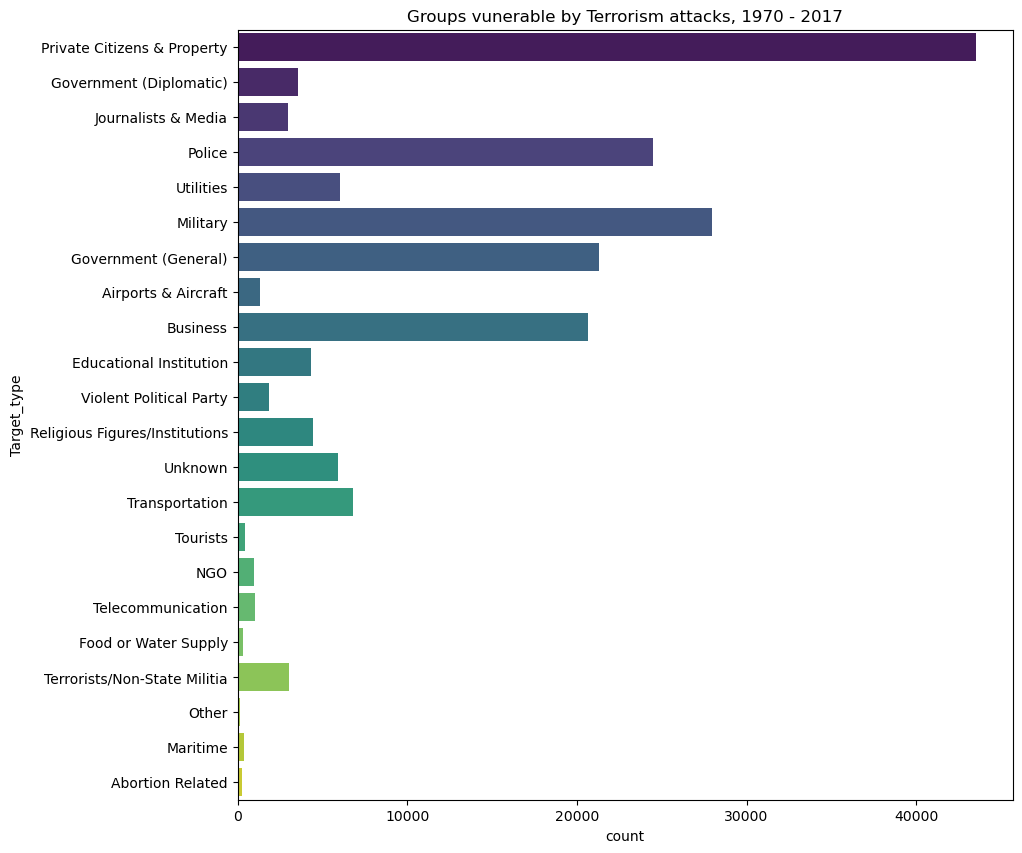

In [49]:
# it is observed that 'Private Citizens & Property', 'Military','Police' & Govt are groups vunerable to terrorism attacks
plt.figure(figsize=(10,10), dpi=100)
sns.countplot(data=df, y='Target_type', palette='viridis')
plt.title('Groups vunerable by Terrorism attacks, 1970 - 2017', fontsize=12);

In [132]:
# to see number of all Regions and total terrorism attacks
pd.DataFrame(df['Region'].value_counts().head(12))

,count
Region,
South Asia,23061
Middle East & North Africa,21097
South America,13735
Western Europe,11587
Sub-Saharan Africa,11493
Central America & Caribbean,6657
Southeast Asia,6455
North America,2537
Eastern Europe,1733


In [133]:
# to read into a new dataframe
region_total_attacks = df['Region'].value_counts().head(12)

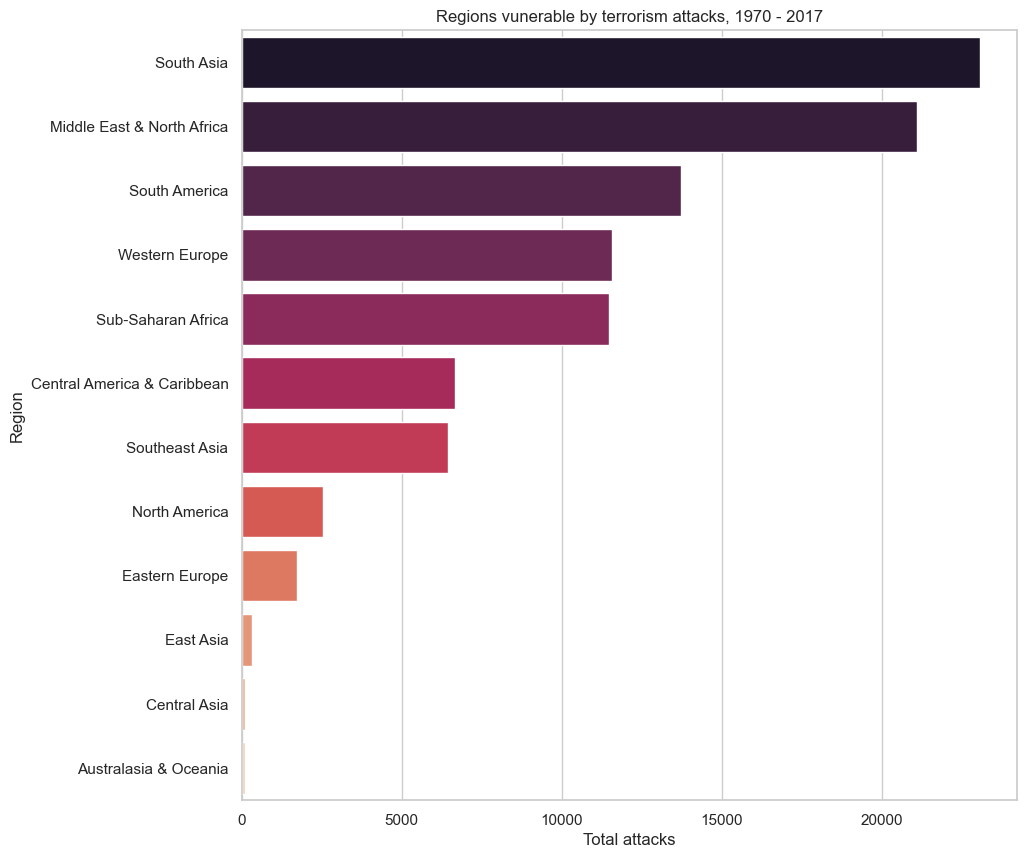

In [134]:
# 'Middle East & North Africa','South Asia','South America' are top 3 Region vunerable by terrorism attacks
# to visualise Top 20 regions total attacks
plt.figure(figsize=(10,10), dpi=100)
sns.barplot(x=region_total_attacks.values, y=region_total_attacks.index, palette='rocket')
plt.title('Regions vunerable by terrorism attacks, 1970 - 2017')
plt.xlabel('Total attacks');

In [77]:
# to see top 10 groups targetted by Terrorism attacks
df['Group'].value_counts().head(10)

Group
Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: count, dtype: int64

In [79]:
# to remove 'Unknown' in 'Group' column
df = df[df['Group']!='Unknown']

In [82]:
# Taliban is the most active Terrorist group in the world, 1970 - 2017
# Islamic State of Iraq and the Levant and Shining Path comes in next
pd.DataFrame(df['Group'].value_counts().head(10))

,count
Group,
Taliban,7478
Islamic State of Iraq and the Levant (ISIL),5613
Shining Path (SL),4555
Farabundo Marti National Liberation Front (FMLN),3351
Al-Shabaab,3288
New People's Army (NPA),2772
Irish Republican Army (IRA),2671
Revolutionary Armed Forces of Colombia (FARC),2487
Boko Haram,2418


In [91]:
# to see the Total count of terrorist attacks by Country and Casualities (Total killed + Wounded)
country_terrorist_attack = df.groupby('Country').agg({'Country':'count','Killed':'sum','Wounded':'sum'})

In [92]:
country_terrorist_attack.columns = ['Total Attacks','Total Killed','Total Wounded']
country_terrorist_attack.reset_index(inplace=True)

In [93]:
country_terrorist_attack['Casualties'] = country_terrorist_attack['Total Killed'] + country_terrorist_attack['Total Wounded']
country_terrorist_attack.drop(['Total Killed', 'Total Wounded'], axis=1, inplace=True)

In [123]:
country_terrorist_attack

,Country,Total Attacks,Casualties
0,Afghanistan,7925,63874.0
1,Albania,1,0.0
2,Algeria,1560,10075.0
3,Andorra,1,0.0
4,Angola,438,5189.0
...,...,...,...
187,Yemen,2322,15645.0
188,Yugoslavia,74,221.0
189,Zaire,17,282.0
190,Zambia,32,77.0


In [124]:
# there are 12 Regions stated in the dataset
df['Region'].nunique()

12

In [125]:
# Attacks basaed on the region 

region_attack_counts = df.groupby(['Region', 'AttackType']).size().reset_index()
region_attack_counts.columns = ['Region', 'AttackType', 'Attack Count']

region = df.Region.unique()

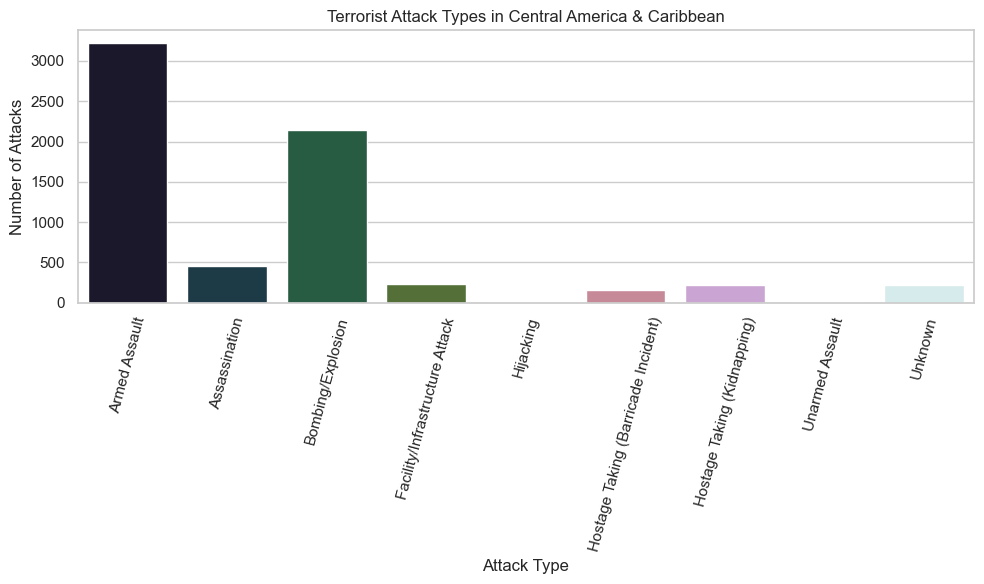

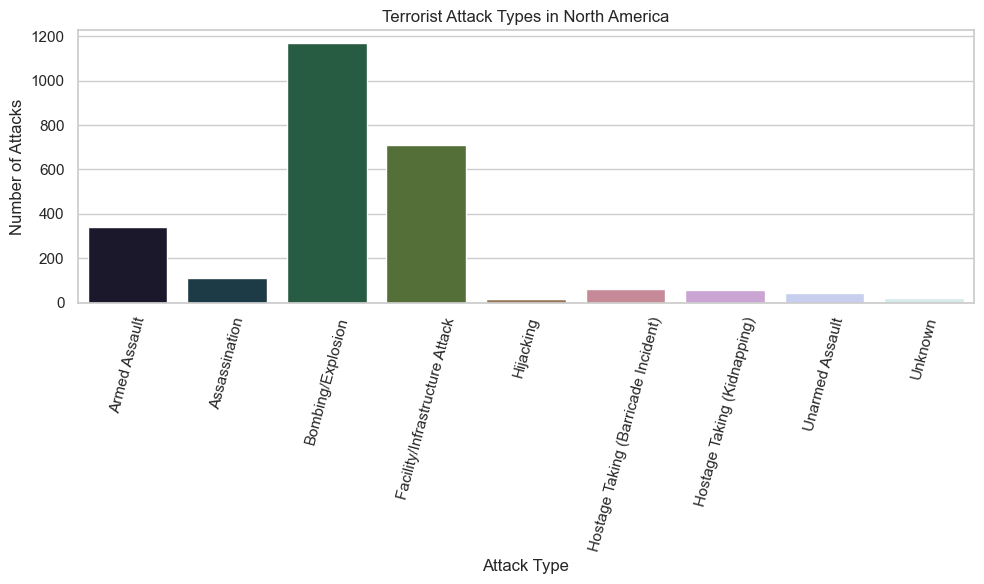

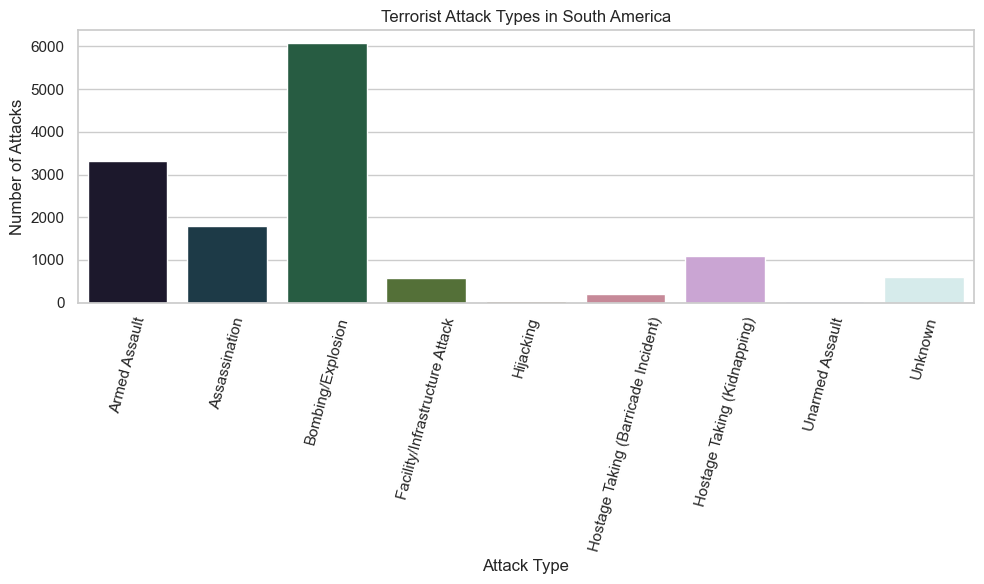

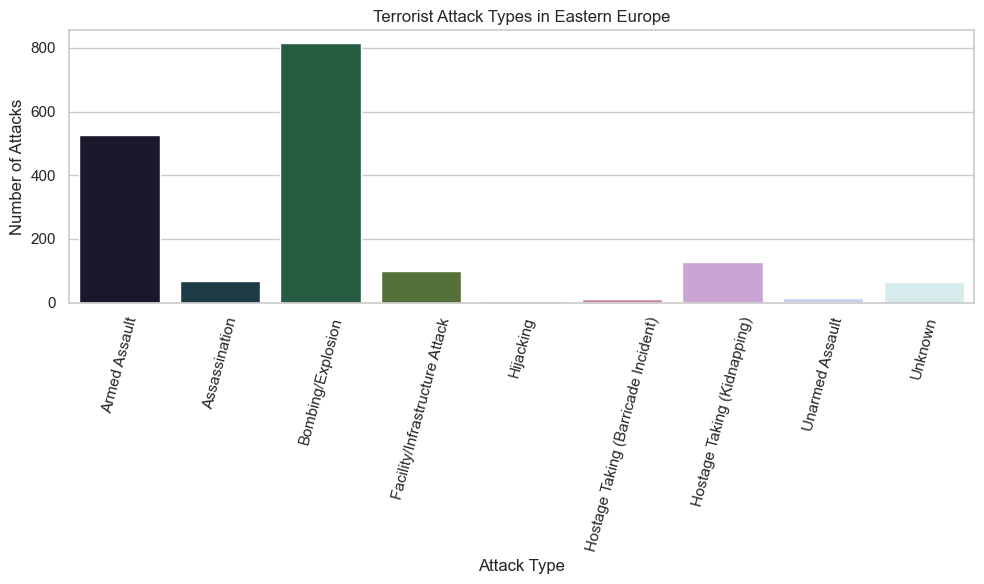

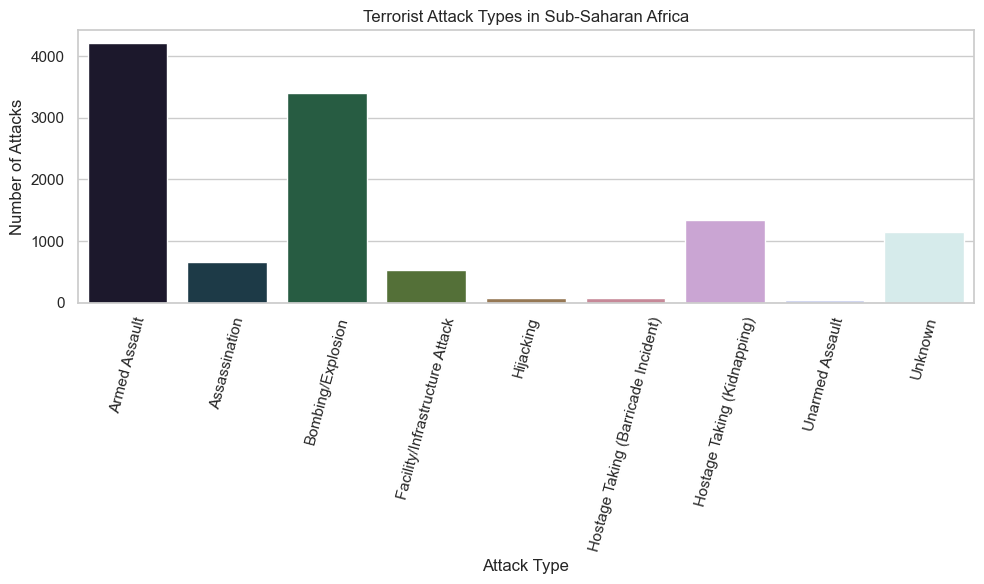

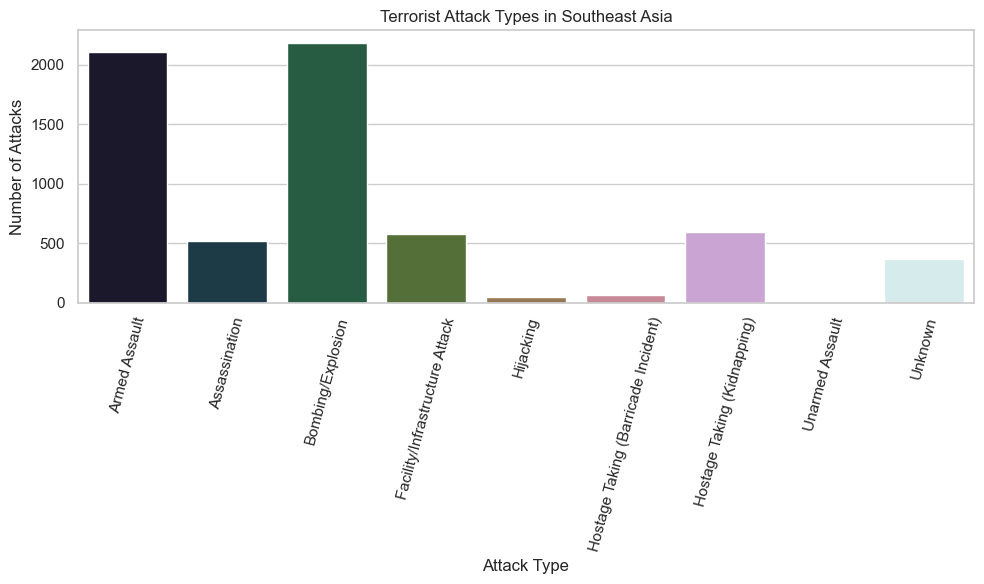

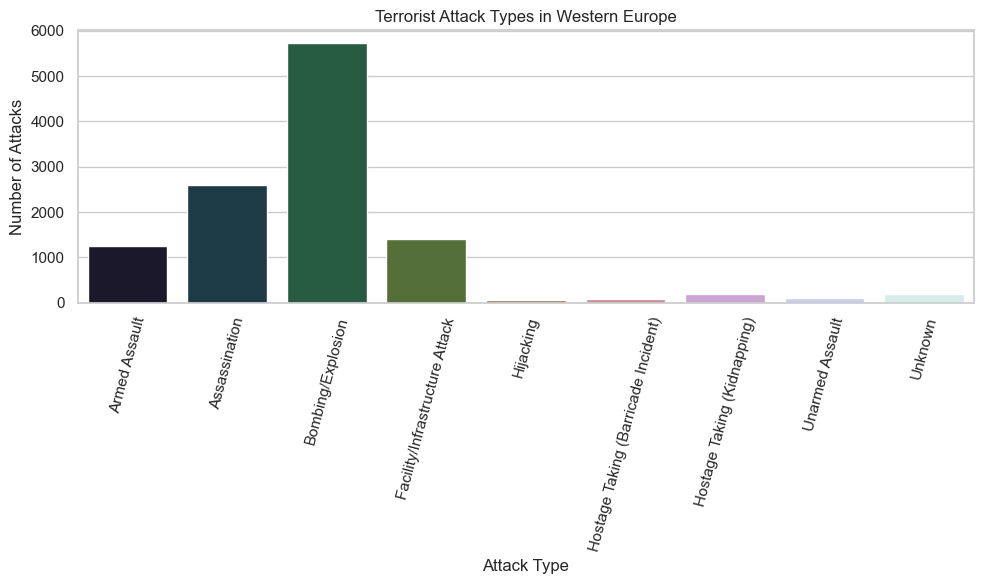

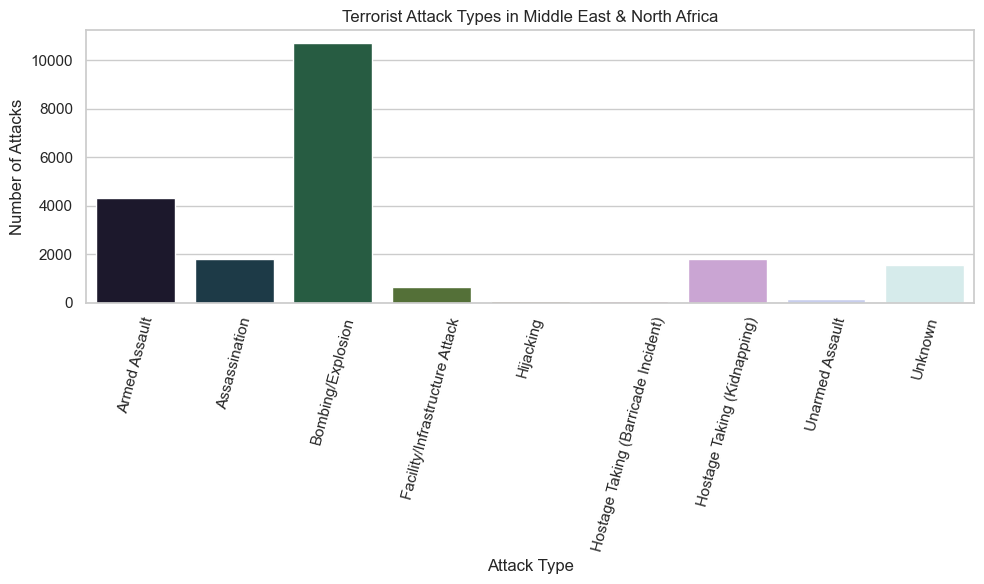

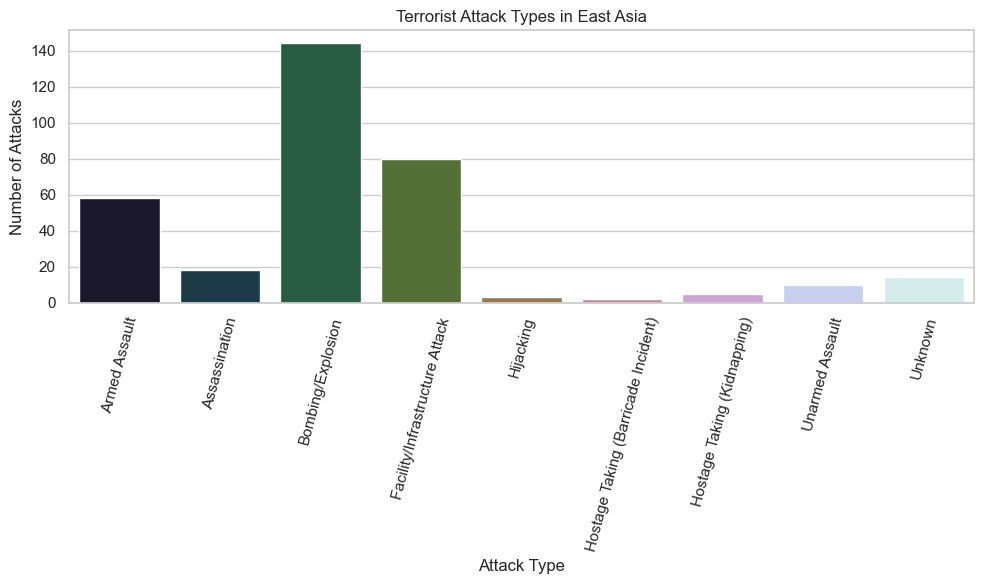

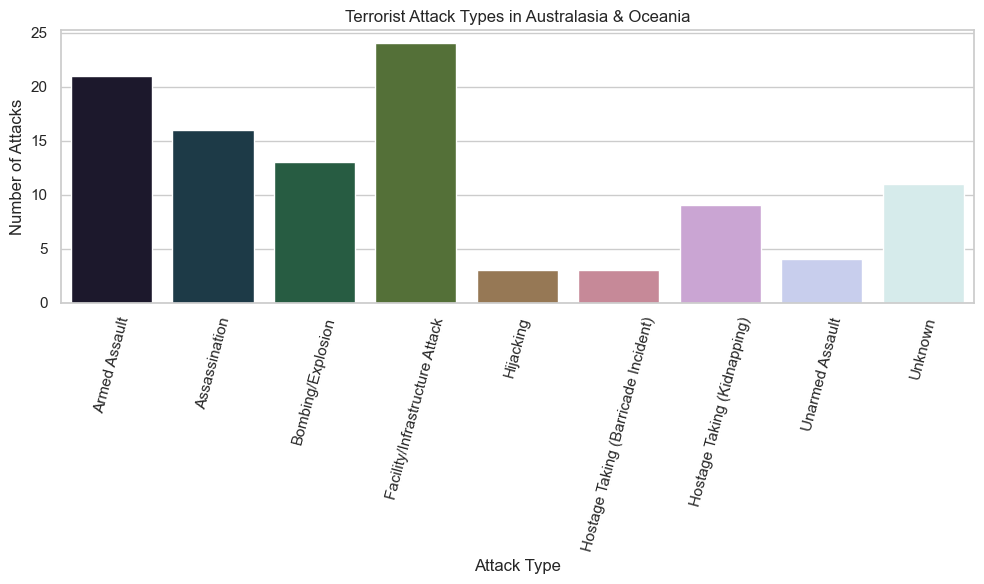

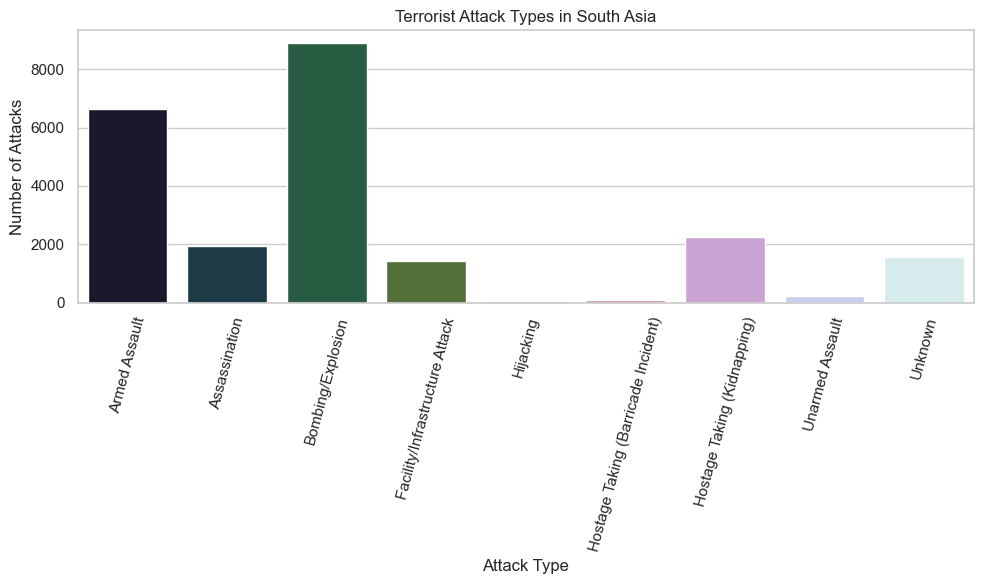

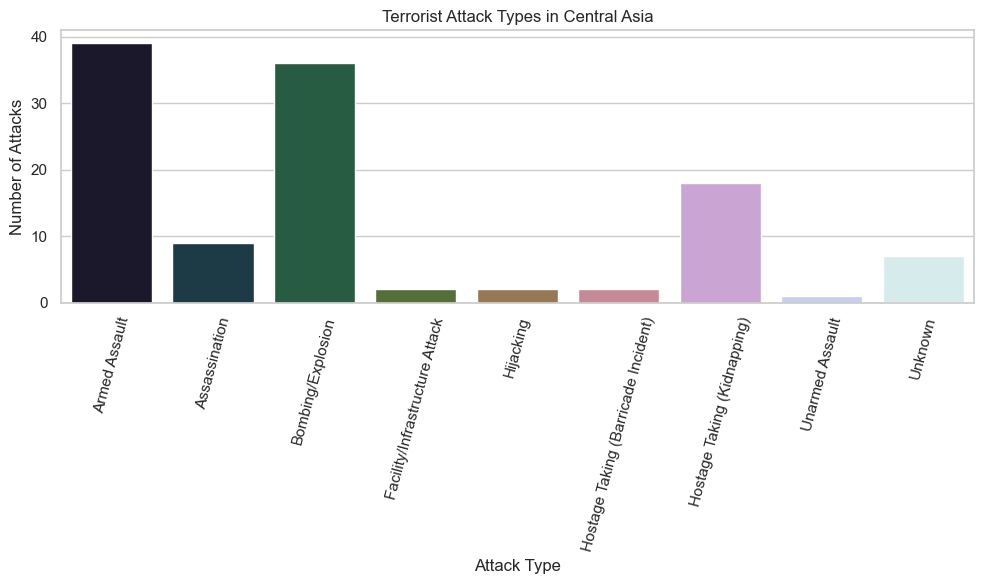

In [126]:
# Attack type specific to region wise

def region_attack_type(region):
    sns.set(style="whitegrid")
    
    for i in region:
        selected_region = i

        # Filter the data for the selected region
        selected_region_data = region_attack_counts[region_attack_counts['Region'] == selected_region]

        # Create the bar plot
        plt.figure(figsize=(10, 6))
        sns.barplot(data=selected_region_data, x='AttackType', y='Attack Count', palette="cubehelix")
        plt.title(f'Terrorist Attack Types in {selected_region}')
        plt.xlabel('Attack Type')
        plt.ylabel('Number of Attacks')
        plt.xticks(rotation=75)
        plt.tight_layout();

region_attack_type(region)

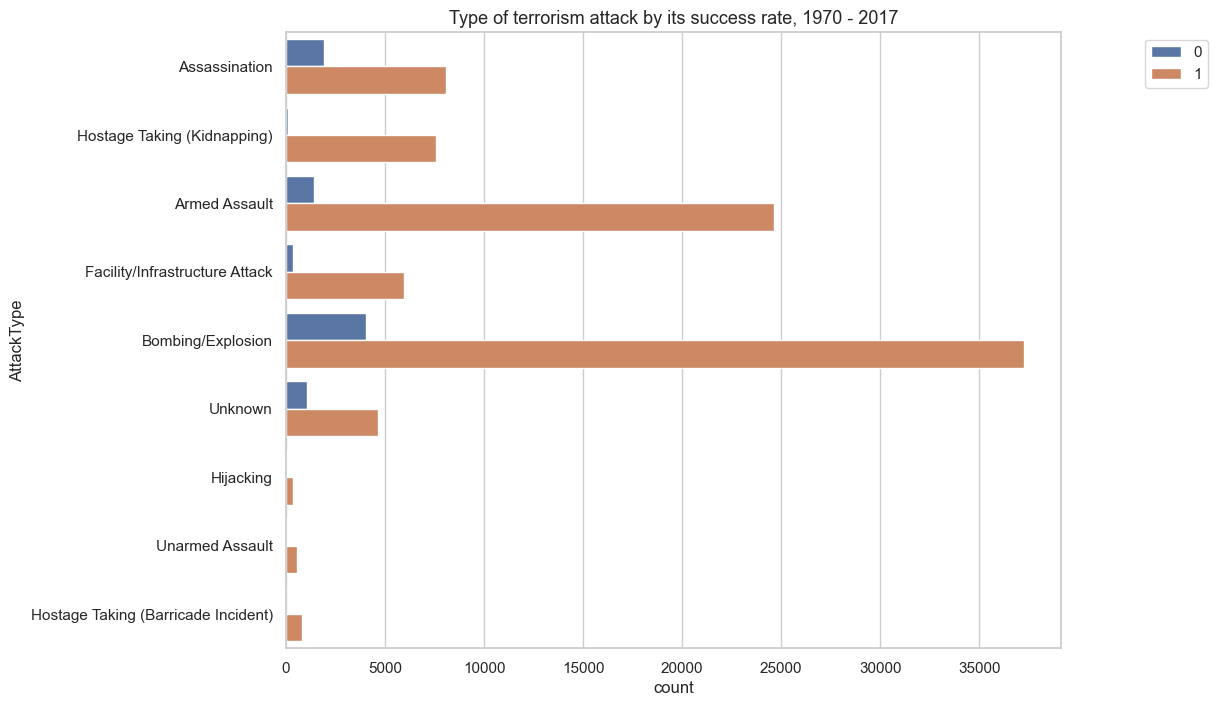

In [128]:
# 'Bombing/Explosion', 'Assassination' are the terrorism types that has the highest success rate
plt.figure(figsize=(10,8), dpi=100)
sns.countplot(data=df, y='AttackType', hue='success')
plt.legend(bbox_to_anchor=(1.2,1.0))
plt.title('Type of terrorism attack by its success rate, 1970 - 2017', fontsize=13);

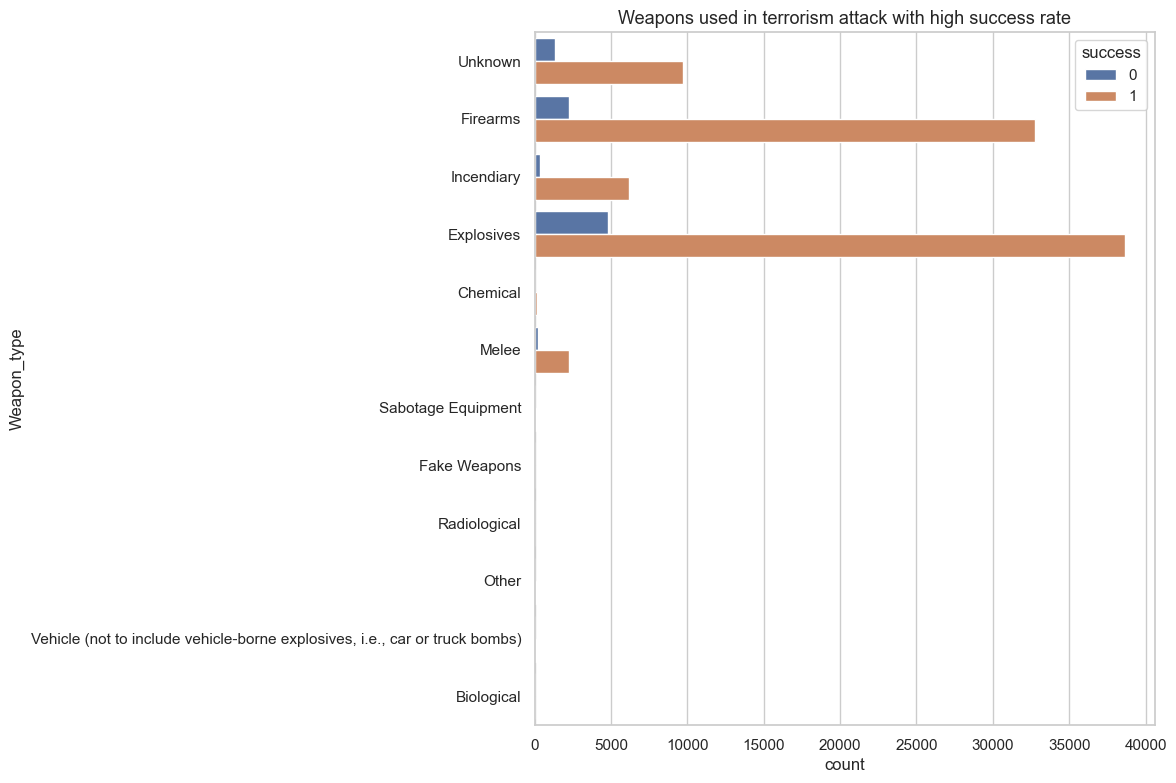

In [130]:
# 'Explosives','Firearms' used in terrorism attacks have the highest success rate
plt.figure(figsize=(8,9), dpi=100)
sns.countplot(data=df,y='Weapon_type', hue='success')
plt.title('Weapons used in terrorism attack with high success rate', fontsize=13);